In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install sktime[all_extras]

In [3]:
import pandas as pd
from sktime.utils.plotting import plot_series
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.forecasting.ets import AutoETS
import matplotlib.pyplot as plt
from sktime.forecasting.base import ForecastingHorizon
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.arima import AutoARIMA

In [4]:
wgem = pd.read_csv("/content/drive/MyDrive/Datasets/WGEM-IND_CPTOTNSXN.csv",index_col=0)
wgem.head(3)

,Value
Date,
31-12-1987,19.448655
31-12-1988,21.274000
31-12-1989,21.967677


In [5]:
idx = pd.to_datetime( wgem.index , dayfirst=True).to_period("Y")
wgem.index = idx

In [ ]:
y = wgem['Value']
y_train, y_test = temporal_train_test_split(y, test_size=4)
plot_series(y_train, y_test, labels=["y_train", "y_test"])
plt.show()

In [7]:
fh = ForecastingHorizon(y_test.index,is_relative=False)

**ETS fitting**

In [ ]:
forecaster = AutoETS(auto=True, sp=1)
forecaster.fit(y_train)
y_pred = forecaster.predict(fh)
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))

In [ ]:
print(forecaster.summary())

### Auto ARIMA

In [14]:
forecaster = AutoARIMA(sp=1, d=0, max_p=3, max_q=3, suppress_warnings=True, trace=True)
forecaster.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=118.151, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=266.411, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.07 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=306.305, Time=0.01 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=141.707, Time=0.15 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=116.219, Time=0.19 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=157.485, Time=0.09 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=115.069, Time=0.14 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=inf, Time=0.22 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=115.948, Time=0.24 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=115.629, Time=0.12 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 1.638 seconds


AutoARIMA(d=0, max_p=3, max_q=3, suppress_warnings=True, trace=True)

In [15]:
print(forecaster.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   27
Model:               SARIMAX(2, 0, 0)   Log Likelihood                 -53.534
Date:                Mon, 17 Jul 2023   AIC                            115.069
Time:                        14:00:31   BIC                            120.252
Sample:                    12-31-1987   HQIC                           116.610
                         - 12-31-2013                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.5234      0.634      0.826      0.409      -0.718       1.765
ar.L1          1.9733      0.041     47.833      0.000       1.892       2.054
ar.L2         -0.9772      0.039    -24.946      0.0

119.8117902246851


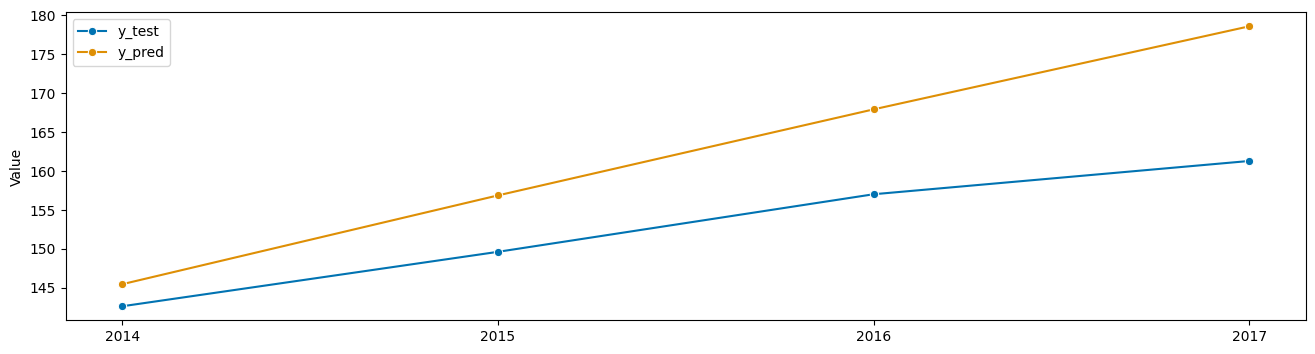

In [16]:
y_pred = forecaster.predict(fh)
plot_series(y_test, y_pred, labels=["y_test", "y_pred"])
print(mean_squared_error(y_test, y_pred,square_root=False))